## Research Proposal

#### Problem - Define, Justify, Review:

(1) Often times articles may not receive the maximum number of ‘recommends’ possible.

(2)	If the articles do not receive the maximum amount of ‘recommends’, they are less likely to be recommended and read by the maximum number of readers. The organization (Medium) receives less traffic and loses the accompanying business benefits when content delivery is not optimized.

(3)	Currently, minimal guidance is publicly given to writers in regard to the optimal article length for maximizing 'recommends'.

#### Hypothesis:

(1)	Writing articles that are 2000 words or less will increase the average number of ‘recommends’ or unique users that ‘clap’ for an article.

#### Rollout plan:

A. Conduct t-test on existing Medium article dataset by splitting it into two segments: 

(1)	Articles with 2000 words or less

(2)	Articles with over 2000 words

(3)	Compare mean number of recommends between the two datasets

B. Use t-test info to determine if the two groups have a statistically significant difference in mean number of recommends

(1)	Threshhold: Number of standard deviations from mean above 3 since sample size is very large

C. Standard for evaluation of significance: p-value less than 0.5%.

### NULL HYPOTHESIS: 

### The length of Medium Articles does not impact the number of recommends (There is no statistically significant difference in the number of recommends between articles with 2000 words or less and those with over 2000 words).

### Parameters:

#### Metric: Mean Recommends. 

Supplemental Metric: Average Number of Recommends per unit of Standard Deviation

#### Duration: 
Articles first published between 2010-2018, samples collected over the period between Sept 2017 and Sept 2018.

#### Sample Size: 
65000 articles

#### Sample Composition: 
The data contains all posts tagged AI, Machine Learning, Datascience or Artificial Intelligence on Medium during the sample period.


### Dataset: https://www.kaggle.com/aiswaryaramachandran/medium-articles-with-content

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
%matplotlib inline

In [2]:
medium = pd.read_csv('mediumdata.csv')

In [3]:
medium.columns

Index(['audioVersionDurationSec', 'codeBlock', 'codeBlockCount',
       'collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
       'firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'language', 'latestPublishedDate', 'latestPublishedDatetime',
       'linksCount', 'postId', 'readingTime', 'recommends',
       'responsesCreatedCount', 'socialRecommendsCount', 'subTitle',
       'tagsCount', 'text', 'title', 'totalClapCount', 'uniqueSlug',
       'updatedDate', 'updatedDatetime', 'url', 'vote', 'wordCount',
       'publicationdescription', 'publicationdomain',
       'publicationfacebookPageName', 'publicationfollowerCount',
       'publicationname', 'publicationpublicEmail', 'publicationslug',
       'publicationtags', 'publicationtwitterUsername', 'tag_name', 'slug',
       'name', 'postCount', 'author', 'bio', 'userId', 'userName',
       'usersFollowedByCount', 'usersFollowedCount', 'scrappedDate'],
      dtype='object')

In [4]:
cleanmedium = medium.drop(['audioVersionDurationSec', 'codeBlockCount', 'scrappedDate',\
                           'codeBlock', 'createdDate', 'createdDatetime', 'text', \
                           'uniqueSlug', 'vote', 'publicationdescription', \
                           'publicationdomain','publicationfacebookPageName', 'publicationpublicEmail',\
                           'publicationslug','publicationtags', 'publicationtwitterUsername',\
                           'slug', 'author', 'bio', 'userId', 'publicationfollowerCount',\
                           'socialRecommendsCount', 'firstPublishedDate',  'latestPublishedDate',\
                           'updatedDate', 'subTitle', 'name', 'tag_name', 'postCount', \
                           'collectionId', 'updatedDatetime'], axis=1)

In [5]:
cleanmedium.columns

Index(['firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'language', 'latestPublishedDatetime', 'linksCount', 'postId',
       'readingTime', 'recommends', 'responsesCreatedCount', 'tagsCount',
       'title', 'totalClapCount', 'url', 'wordCount', 'publicationname',
       'userName', 'usersFollowedByCount', 'usersFollowedCount'],
      dtype='object')

In [6]:
cleanmedium.head(3)

,firstPublishedDatetime,imageCount,isSubscriptionLocked,language,latestPublishedDatetime,linksCount,postId,readingTime,recommends,responsesCreatedCount,tagsCount,title,totalClapCount,url,wordCount,publicationname,userName,usersFollowedByCount,usersFollowedCount
0,2018-09-18 20:57:03,1,False,en,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
1,2018-09-18 20:57:03,1,False,en,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
2,2018-09-18 20:57:03,1,False,en,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0


In [7]:
cleanmedium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279577 entries, 0 to 279576
Data columns (total 19 columns):
firstPublishedDatetime     279577 non-null object
imageCount                 279577 non-null int64
isSubscriptionLocked       279577 non-null bool
language                   279577 non-null object
latestPublishedDatetime    279577 non-null object
linksCount                 279577 non-null int64
postId                     279577 non-null object
readingTime                279577 non-null float64
recommends                 279577 non-null int64
responsesCreatedCount      279577 non-null int64
tagsCount                  279577 non-null int64
title                      279572 non-null object
totalClapCount             279577 non-null int64
url                        279577 non-null object
wordCount                  279577 non-null int64
publicationname            137231 non-null object
userName                   279577 non-null object
usersFollowedByCount       279577 non-null floa

In [8]:
cleanmedium.set_index('postId', drop=True, inplace=True)
cleanmedium = cleanmedium.loc[cleanmedium.language == 'en']
cleanmedium = cleanmedium.drop('language', axis=1)
cleanmedium['firstPublishedDatetime'] = pd.to_datetime(cleanmedium['firstPublishedDatetime'])
cleanmedium['latestPublishedDatetime'] = pd.to_datetime(cleanmedium['latestPublishedDatetime'])
cleanmedium.publicationname.fillna(0, inplace=True)
cleanmedium.dropna(inplace=True)
cleanmedium.replace({c: {True: 'Yes', False: 'No'} for c in cleanmedium.select_dtypes([bool])}, inplace=True)

In [9]:
cleanmedium.drop_duplicates(inplace=True)

In [10]:
cleanmedium.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,66379.000000,66379.000000,66379.000000,66379.000000,66379.00000,66379.000000,66379.000000,66379.000000,66379.000000,66379.000000
mean,3.550189,6.606577,3.983773,25.196252,0.90277,4.299929,173.132798,922.508971,1776.941171,297.815077
std,5.399195,11.746198,3.506801,277.393091,14.94077,1.203043,1891.904227,871.067142,13030.049705,1578.252735
min,0.000000,0.000000,0.003774,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.920755,0.000000,0.00000,4.000000,0.000000,421.000000,8.000000,3.000000
50%,2.000000,4.000000,3.180189,2.000000,0.00000,5.000000,6.000000,720.000000,53.000000,22.000000
75%,4.000000,8.000000,5.011792,8.000000,0.00000,5.000000,65.000000,1158.000000,324.000000,127.000000
max,263.000000,1180.000000,99.603774,42288.000000,3076.00000,6.000000,291706.000000,24964.000000,333655.000000,85867.000000


In [11]:
medium_no_outliers = cleanmedium[np.abs(cleanmedium.recommends-cleanmedium.recommends.mean())<=(1.96*cleanmedium.recommends.std())]
medium_outliers = cleanmedium[~(np.abs(cleanmedium.recommends-cleanmedium.recommends.mean())<=(1.96*cleanmedium.recommends.std()))]

In [12]:
medium_no_outliers.shape

(65939, 17)

In [13]:
medium_outliers.shape

(440, 17)

In [14]:
medium_no_outliers.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000
mean,3.516902,6.497247,3.950513,13.213652,0.525622,4.297002,100.308209,914.545792,1681.940308,295.481354
std,5.353202,10.381663,3.456207,43.478352,2.843405,1.205125,325.327859,858.406678,12744.215104,1571.015792
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.913208,0.000000,0.000000,4.000000,0.000000,420.000000,8.000000,3.000000
50%,2.000000,4.000000,3.166038,2.000000,0.000000,5.000000,6.000000,717.000000,52.000000,22.000000
75%,4.000000,8.000000,4.979874,7.000000,0.000000,5.000000,63.000000,1150.000000,314.000000,126.000000
max,263.000000,613.000000,99.603774,567.000000,342.000000,6.000000,10258.000000,24964.000000,333655.000000,85867.000000


In [15]:
cleanmedium = medium_no_outliers 

In [75]:
cleanmedium.columns

Index(['firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'latestPublishedDatetime', 'linksCount', 'readingTime', 'recommends',
       'responsesCreatedCount', 'tagsCount', 'title', 'totalClapCount', 'url',
       'wordCount', 'publicationname', 'userName', 'usersFollowedByCount',
       'usersFollowedCount'],
      dtype='object')

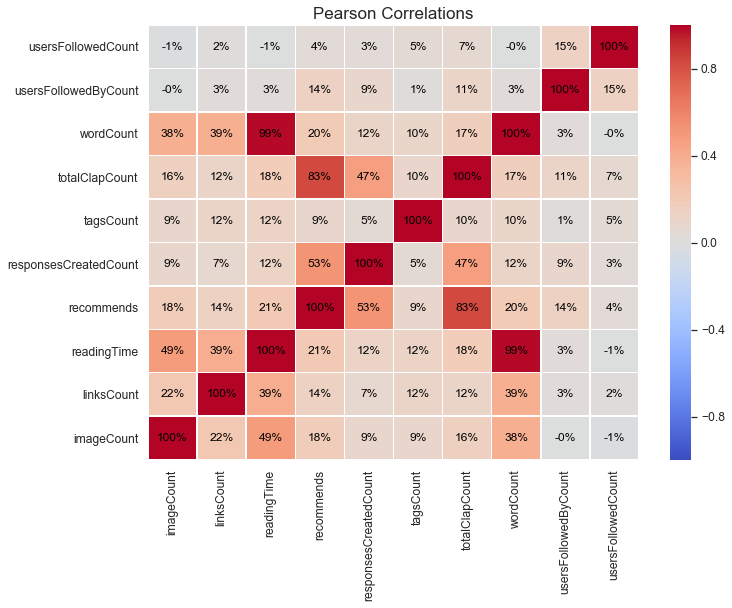

In [58]:
plt.figure(figsize=(11,8))
sns.set(font_scale=1.1)
ax = sns.heatmap(cleanmedium.corr(), linewidth=0.5, cmap='coolwarm',vmin = -1, vmax=1, annot=True, fmt='.0%',\
    annot_kws = {'size': 12, 'color':'black'})
plt.title('Pearson Correlations', size=17)
ax.set_ylim(-0.01,10)

plt.show()

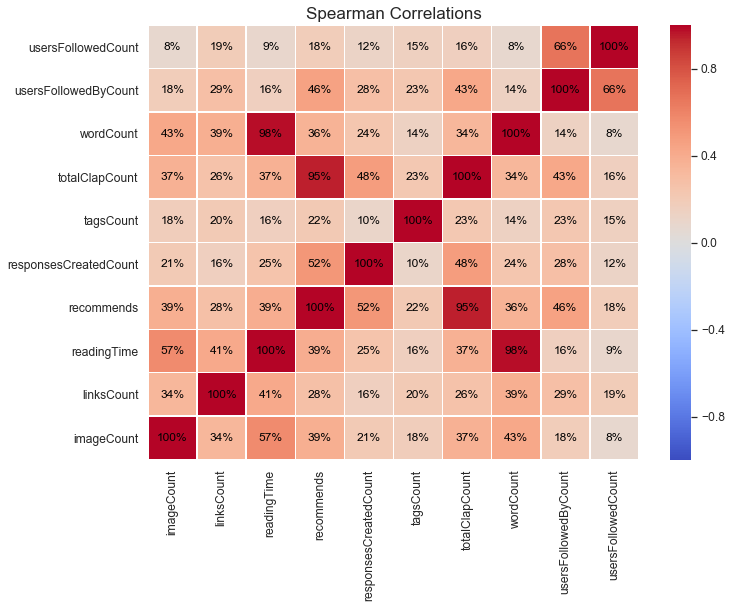

In [17]:
plt.figure(figsize=(11,8))
sns.set(font_scale=1.1)
ax = sns.heatmap(cleanmedium.corr(method='spearman'), linewidth=0.5, cmap='coolwarm',vmin = -1, vmax=1, \
                 annot=True, fmt='.0%', annot_kws = {'size': 12, 'color':'black'})
ax.set_ylim(-0.01,10)
plt.title('Spearman Correlations', size=17)

plt.savefig('spearmancorr.png', bbox_inches="tight", dpi=1200)


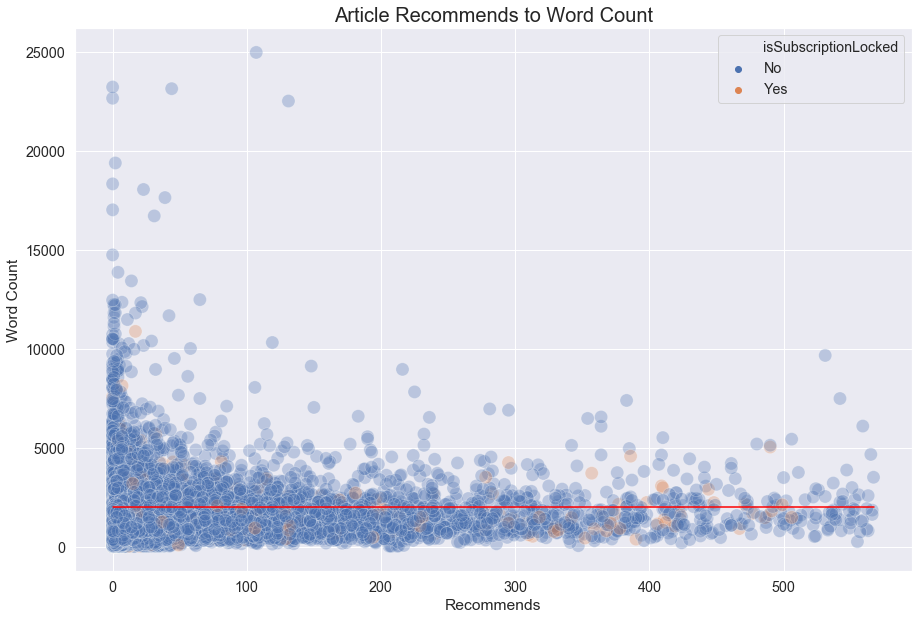

In [18]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.3)
sns.scatterplot(x='recommends', y='wordCount', hue='isSubscriptionLocked', data=cleanmedium, alpha=0.3, s=175)
sns.lineplot(x=cleanmedium['recommends'], y=2000, color='red')
plt.ylabel('Word Count')
plt.xlabel('Recommends')
plt.title('Article Recommends to Word Count', size=20)

plt.savefig('rectoword.png', bbox_inches="tight", dpi=1200)

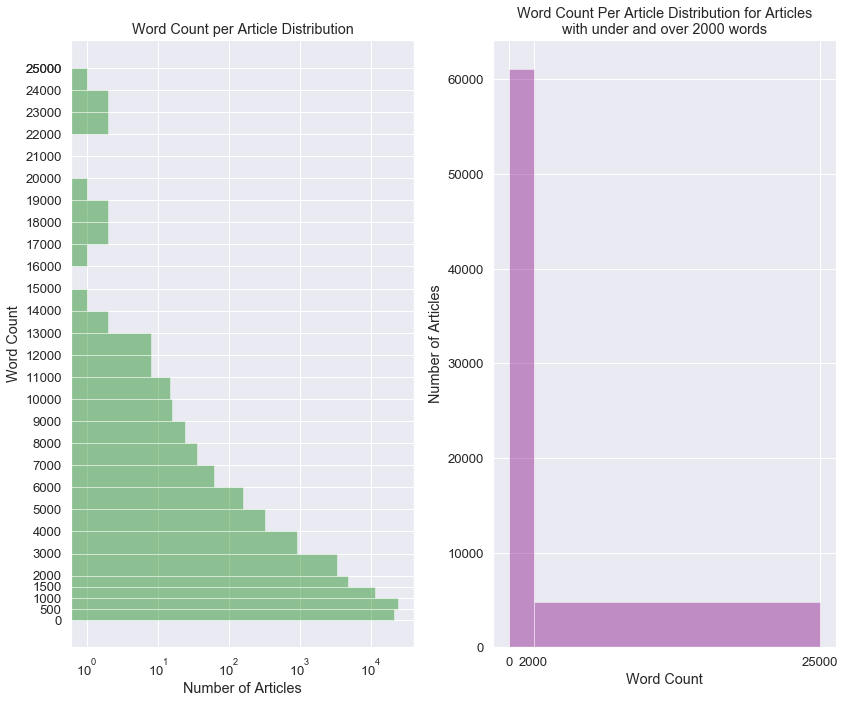

In [19]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)

plt.subplot(1,2,1)
sns.distplot(cleanmedium['wordCount'], kde=False, vertical=True, color='green',bins=[0,500,1000,1500,2000,3000,4000,\
           5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,\
           17000,18000,19000,20000,21000,22000,23000,24000,25000, 25000])
ylabels = [0,500,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,\
           17000,18000,19000,20000,21000,22000,23000,24000,25000, 25000]
plt.yticks(ylabels)
plt.ylabel('Word Count')
plt.xlabel('Number of Articles')
plt.xscale('log')
plt.title('Word Count per Article Distribution')


plt.subplot(1,2,2)
sns.distplot(cleanmedium['wordCount'], kde=False, vertical=False, color='purple',bins=[0,2000, 25000])
xlabels = [0,2000, 25000]
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.xticks(xlabels)
plt.title('Word Count Per Article Distribution for Articles' + '\n' + 'with under and over 2000 words')


plt.tight_layout()

plt.savefig('wordcountperboth.png', bbox_inches="tight", dpi=1200)


In [20]:
data1 = cleanmedium.loc[cleanmedium.wordCount <= 2000]
data2 = cleanmedium.loc[cleanmedium.wordCount > 2000]

In [134]:
cleanmedium.url.groupby(cleanmedium['publicationname']).count().sort_values(ascending=False).apply(lambda x: x/65939 * 100).head(5)

publicationname
0                                                   53.441817
Towards Data Science                                 5.621863
Hacker Noon                                          1.847162
Becoming Human: Artificial Intelligence Magazine     1.146514
Data Driven Investor                                 0.994859
Name: url, dtype: float64

In [135]:
cleanmedium.url.groupby(cleanmedium['isSubscriptionLocked']).count().sort_values(ascending=False).apply(lambda x: x/65939 * 100).head(5)

isSubscriptionLocked
No     97.000258
Yes     2.999742
Name: url, dtype: float64

In [119]:
data1.url.groupby(data1['publicationname']).count().sort_values(ascending=False).apply(lambda x: x/61101 * 100).head(5)

publicationname
0                                                   54.328080
Towards Data Science                                 5.006465
Hacker Noon                                          1.731559
Becoming Human: Artificial Intelligence Magazine     1.119458
Data Driven Investor                                 1.008167
Name: url, dtype: float64

In [133]:
data1.url.groupby(data1['isSubscriptionLocked']).count().sort_values(ascending=False).apply(lambda x: x/61101 * 100).head(5)

isSubscriptionLocked
No     97.180079
Yes     2.819921
Name: url, dtype: float64

In [120]:
data2.url.groupby(data2['publicationname']).count().sort_values(ascending=False).apply(lambda x: x/4838 * 100).head(5)

publicationname
0                                                   42.248863
Towards Data Science                                13.393964
Hacker Noon                                          3.307152
Becoming Human: Artificial Intelligence Magazine     1.488218
The Startup                                          0.992146
Name: url, dtype: float64

In [136]:
data2.url.groupby(data2['isSubscriptionLocked']).count().sort_values(ascending=False).apply(lambda x: x/4838 * 100).head(5)

isSubscriptionLocked
No     94.729227
Yes     5.270773
Name: url, dtype: float64

In [21]:
data1.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000
mean,3.089704,5.657518,3.272125,11.261681,0.451040,4.277851,87.983159,744.589287,1627.095367,296.731297
std,4.318414,7.766006,1.915814,38.055425,2.725898,1.219575,298.202962,453.282674,12320.101104,1571.418537
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.822642,0.000000,0.000000,4.000000,0.000000,398.000000,8.000000,3.000000
50%,2.000000,3.000000,2.969182,2.000000,0.000000,5.000000,5.000000,670.000000,48.000000,22.000000
75%,4.000000,8.000000,4.472956,7.000000,0.000000,5.000000,56.000000,1027.000000,292.000000,124.000000
max,188.000000,229.000000,12.431132,566.000000,342.000000,6.000000,10258.000000,2000.000000,333655.000000,85867.000000


In [22]:
data2.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000
mean,8.912154,17.102522,12.518146,37.865854,1.467549,4.538859,255.966102,3060.993179,2374.598594,279.695329
std,11.120366,24.207553,6.102734,82.582933,3.923720,0.973092,541.618909,1573.672193,17210.703982,1565.996515
min,0.000000,0.000000,7.566038,0.000000,0.000000,1.000000,0.000000,2001.000000,0.000000,0.000000
25%,2.000000,4.000000,9.326730,1.000000,0.000000,5.000000,3.000000,2240.000000,21.000000,5.000000
50%,6.000000,11.000000,10.730660,7.000000,0.000000,5.000000,53.000000,2586.000000,113.000000,31.000000
75%,12.000000,21.000000,13.436557,30.000000,1.000000,5.000000,232.000000,3267.750000,634.000000,148.000000
max,263.000000,613.000000,99.603774,567.000000,63.000000,6.000000,5499.000000,24964.000000,333655.000000,41130.000000


In [103]:
under_2000 = data1.sample(2500)
over_2000 = data2.sample(2500)

y1 = np.mean(under_2000.recommends)
y2 = np.mean(over_2000.recommends)
s1 = np.std(under_2000.recommends)
s2 = np.std(over_2000.recommends)
n1 = 2500
n2 = 2500


print('The mean number of Recommends for posts with 2000 words or less is {}'.format(round(y1,2)))
print('The mean number of Recommends for posts over 2000 words is {}'.format(round(y2,2)))
print('The standard deviation of Recommends for posts with 2000 words or less is {}'.format(round(s1,2)))
print('The standard deviation of Recommends for posts with over 2000 words is {}'.format(round(s2,2)))
print('The Sample Size for both groups is {}'.format(n1))

The mean number of Recommends for posts with 2000 words or less is 10.99
The mean number of Recommends for posts over 2000 words is 37.51
The standard deviation of Recommends for posts with 2000 words or less is 37.85
The standard deviation of Recommends for posts with over 2000 words is 82.65
The Sample Size for both groups is 2500


In [24]:
t_value = (y1-y2) / np.sqrt(((s1**2) / n1) + ((s2**2) / n2))

In [99]:
print('The T-value is {}'.format(t_value))

The T-value is -14.86512129303059


In [26]:
from scipy import stats

In [27]:
stats.ttest_ind(under_2000.recommends, over_2000.recommends)

Ttest_indResult(statistic=-14.862147971410085, pvalue=6.3489346247111366e-49)

In [28]:
y11 = np.mean(data1.recommends)
y22 = np.mean(data2.recommends)
s11 = np.std(data1.recommends)
s22 = np.std(data2.recommends)

print('y11 is {}'.format(y11))
print('y22 is {}'.format(y22))
print('s11 is {}'.format(s11))
print('s22 is {}'.format(s22))

y11 is 11.261681478208212
y22 is 37.86585365853659
s11 is 38.055113960918575
s22 is 82.5743979611165


In [29]:
R1 = y11/s11

R2 = y22/s22

In [30]:
print('The mean number of recommends per unit of standard deviation for articles with 2000 words or less is {}'.format(R1))
print('The mean number of recommends per unit of standard deviation for articles with over 2000 words is {}'.format(R2))

The mean number of recommends per unit of standard deviation for articles with 2000 words or less is 0.29593083047323443
The mean number of recommends per unit of standard deviation for articles with over 2000 words is 0.45856651206064203


### Results:

The NULL Hypothesis is rejected (p-value < 0.05). The mean number of recommends for the samples from the two groups of articles (over 2000 words and 2000 words or less) are statistically different. With the mean number of recommends for the 2000 words or less sample varying over 14 standard deviations from the mean number of recommends of articles over 2000 words. 

### Recommendations:

The data appears to show articles with a word count over 2000 words are more likely to recieve a higher number of recommends. These results have only been shown for this dataset which includes articles tagged with AI, Machine Learning, Datascience or Aritificial Intelligence. Further research and experiments should be conducted before attempting to extrapolate these results to other article types and I would recommend using an even larger dataset. However, this analysis does provide a great starting point for further research and implies my inititial instinct was incorrect as I did not expect articles of greater length to be more highly recommended.

In [123]:
x = [1000,1500,2000,2500,3000,3500,4000,4500]

y = [100,200,300,400,500,600,700,800,900,950]

z = [5000,7500,10000,12500,15000,17500,20000,22500,25000]

data_dict = {}
data_dict_full = {}

for b1 in y:
    for b2 in z:
        for a1 in x:
            data1b = cleanmedium.loc[(cleanmedium.wordCount <= a1) & (cleanmedium.wordCount > b1)]
            data2b = cleanmedium.loc[(cleanmedium.wordCount > a1) & (cleanmedium.wordCount <= b2)]
            
            under_a = data1b.sample(int(round(min(len(list(data1b.recommends.values)),\
                                                  len(list(data2b.recommends.values))/2),0)))
            over_a = data2b.sample(int(round(min(len(list(data1b.recommends.values)), \
                                                 len(list(data2b.recommends.values))/2),0)))

            ya = np.mean(under_a.recommends)
            yb = np.mean(over_a.recommends)
            sa = np.std(under_a.recommends)
            sb = np.std(over_a.recommends)
            na = len(list(under_a.recommends.values))
            nb = len(list(over_a.recommends.values))

            t_val = round((ya-yb) / np.sqrt(((sa**2) / na) + ((sb**2) / nb)),6)
            p_val = round(stats.t.sf(np.abs(t_val), na-1)*2,10)
            
            yc = np.mean(data1b.recommends)
            yd = np.mean(data2b.recommends)
            sc = np.std(data1b.recommends)
            sd = np.std(data2b.recommends)

            R1y = round(yc/sc,4) #

            R2z = round(yd/sd,4) #

            data_dict[t_val] = [b1,a1,b2, R1y, R2z, na, len(list(data1b.recommends.values)),\
                                    len(list(data2b.recommends.values)), p_val]


In [124]:
t_values_df = pd.DataFrame(data_dict.values(), index=data_dict.keys(),\
                 columns=['Lower Bound', 'Middle Bound', 'Upper Bound', 'REC/STD1', 'REC/STD2', 'Sample Size', \
                          'Data1 Count', 'Data2 Count', 'P-Value'])

t_values_df.index.name = 'T-Value'

t_values_df = t_values_df.sort_values('T-Value')

In [125]:
len(t_values_df.index.tolist())

720

In [126]:
t_values_df[abs(t_values_df.index) <= 3].describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size,Data1 Count,Data2 Count,P-Value
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,753.750000,4200.000000,13312.500000,0.374449,0.439464,257.08750,31340.350000,514.362500,0.064794
std,211.500815,394.583581,6700.828874,0.023568,0.013982,142.67873,10605.566097,285.132447,0.118740
min,100.000000,3000.000000,5000.000000,0.308900,0.423300,64.00000,21224.000000,129.000000,0.003009
25%,600.000000,4000.000000,7500.000000,0.357200,0.425300,184.00000,23619.000000,369.000000,0.009006
50%,800.000000,4500.000000,12500.000000,0.380500,0.434450,231.00000,28295.000000,462.000000,0.027446
75%,900.000000,4500.000000,18125.000000,0.391200,0.446950,325.25000,38601.000000,650.750000,0.073929
max,950.000000,4500.000000,25000.000000,0.396700,0.466700,777.00000,62983.000000,1554.000000,0.920261


In [127]:
t_values_df[t_values_df['Sample Size'] <= 100].describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size,Data1 Count,Data2 Count,P-Value
count,10.000000,10.0,10.0,10.000000,10.0000,10.0,10.000000,10.0,10.000000
mean,545.000000,4500.0,5000.0,0.352040,0.4608,64.0,41929.200000,129.0,0.197283
std,294.816327,0.0,0.0,0.031639,0.0000,0.0,14775.547697,0.0,0.267266
min,100.000000,4500.0,5000.0,0.308900,0.4608,64.0,22316.000000,129.0,0.015605
25%,325.000000,4500.0,5000.0,0.326700,0.4608,64.0,29705.000000,129.0,0.055299
50%,550.000000,4500.0,5000.0,0.350600,0.4608,64.0,41542.500000,129.0,0.105177
75%,775.000000,4500.0,5000.0,0.377525,0.4608,64.0,53834.000000,129.0,0.224684
max,950.000000,4500.0,5000.0,0.396700,0.4608,64.0,62983.000000,129.0,0.920261


In [128]:
t_values_df.drop(t_values_df[t_values_df['Sample Size'] <= 100].index, inplace=True)
t_values_df.drop(t_values_df[abs(t_values_df.index) <= 3].index, inplace=True)

In [129]:
t_values_df.describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size,Data1 Count,Data2 Count,P-Value
count,640.000000,640.000000,640.00000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,518.906250,2568.750000,15210.93750,0.338010,0.441323,2617.056250,37912.290625,5735.970312,0.000116
std,276.537484,1078.655484,6402.82159,0.030565,0.018962,3068.285078,15867.866763,6788.033812,0.000404
min,100.000000,1000.000000,5000.00000,0.272300,0.400800,163.000000,1801.000000,326.000000,0.000000
25%,300.000000,1500.000000,10000.00000,0.313900,0.433100,487.000000,24121.000000,974.000000,0.000000
50%,500.000000,2500.000000,15000.00000,0.333400,0.445900,1323.500000,38404.000000,2647.500000,0.000000
75%,800.000000,3500.000000,20000.00000,0.363800,0.456200,4611.000000,50730.000000,9475.250000,0.000002
max,950.000000,4500.000000,25000.00000,0.396400,0.466700,10491.000000,62983.000000,20982.000000,0.002615


In [116]:
t_values_df.head()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size,Data1 Count,Data2 Count,P-Value
T-Value,,,,,,,,,
-26.830163,200,1000,15000,0.2791,0.4008,10486,39144,20971,0.0
-26.581805,100,1000,7500,0.2723,0.4011,10442,42468,20884,0.0
-26.406724,100,1000,17500,0.2723,0.4008,10486,42468,20973,0.0
-26.078961,100,1000,20000,0.2723,0.4008,10488,42468,20977,0.0
-26.033766,100,1000,22500,0.2723,0.4008,10488,42468,20977,0.0


In [130]:
t_values_df.tail()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size,Data1 Count,Data2 Count,P-Value
T-Value,,,,,,,,,
-3.057102,900,4000,20000,0.3909,0.4325,330,24082,659,0.002418
-3.054355,800,4500,25000,0.3805,0.4266,234,28492,467,0.002518
-3.045300,700,4500,12500,0.3686,0.4253,226,33344,453,0.002602
-3.040720,800,4000,7500,0.3802,0.4464,283,28295,566,0.002582
-3.019457,950,3000,25000,0.3942,0.4463,780,21224,1559,0.002615


In [38]:
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [138]:
item1 = go.Scatter(x = t_values_df.index, y = t_values_df['Sample Size'], 
                   mode='markers', marker_size=12, 
                   marker=dict(color='rgba(150, 206, 250, 0.5)', opacity=1, line=dict(width=2,
                                        color='DarkSlateGrey')))
    
layout = go.Layout(title='T-Value by Sample Size', yaxis=dict(title='Sample Size'),
                xaxis=go.layout.XAxis(dtick=3, title='T-Value'), font=dict(size=17), 
                paper_bgcolor='white', plot_bgcolor='lightgrey')

item = go.Figure(data=item1, layout=layout)

item.update_layout(autosize=False, width=1000, height=700)
                  
plot(item, filename="tvalues_plot.html", auto_open=False)

iplot(item)

plt_div = plot(item, output_type='div', include_plotlyjs=False)

In [40]:
t_values_df.index.max()

-3.007458

In [41]:
t_values_df.index.min()

-26.759076

In [42]:
t_values_df['Sample Size'].max()

10491

In [43]:
t_values_df['Sample Size'].min()

163

In [44]:
t_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 641 entries, -26.759076 to -3.007458
Data columns (total 8 columns):
Lower Bound     641 non-null int64
Middle Bound    641 non-null int64
Upper Bound     641 non-null int64
REC/STD1        641 non-null float64
REC/STD2        641 non-null float64
Sample Size     641 non-null int64
Data1 Count     641 non-null int64
Data2 Count     641 non-null int64
dtypes: float64(2), int64(6)
memory usage: 45.1 KB


In [45]:
new_df = pd.DataFrame()
new_df['Lower Bound'] = t_values_df['Lower Bound'].tolist()
new_df['Upper Bound'] = t_values_df['Middle Bound'].tolist()
new_df['Recommends/STD'] = t_values_df['REC/STD1'].tolist()
new_df['Dataset Size'] = t_values_df['Data1 Count'].tolist()
new_df.reset_index(drop=True)

new_df2 = pd.DataFrame()
new_df2['Lower Bound'] = t_values_df['Middle Bound'].tolist()
new_df2['Upper Bound'] = t_values_df['Upper Bound'].tolist()
new_df2['Recommends/STD'] = t_values_df['REC/STD2'].tolist()
new_df2['Dataset Size'] = t_values_df['Data2 Count'].tolist()
new_df2.reset_index(drop=True)

bound_df = new_df.append(new_df2, ignore_index=True, sort=False)

In [46]:
bound_df.head()

,Lower Bound,Upper Bound,Recommends/STD,Dataset Size
0,100,1000,0.2723,42468
1,100,1000,0.2723,42468
2,200,1000,0.2791,39144
3,100,1000,0.2723,42468
4,100,1000,0.2723,42468


In [47]:
bound_df.tail()

,Lower Bound,Upper Bound,Recommends/STD,Dataset Size
1277,4000,17500,0.4329,655
1278,4000,5000,0.4585,326
1279,4500,25000,0.4266,467
1280,4500,25000,0.4266,467
1281,4500,22500,0.4233,462


In [67]:
item2 = go.Scatter(x = bound_df['Lower Bound'], y = bound_df['Upper Bound'],
                   mode='markers', marker_size=bound_df['Dataset Size'].apply(lambda x : x**(1/3.5)), 
                   text='Dataset Size: ' + bound_df['Dataset Size'].map(str) + ', Rec/Std: ' + bound_df['Recommends/STD'].map(str),
                   marker=dict(color = bound_df['Recommends/STD'], colorscale='Viridis', opacity=0.3, showscale=True, 
                   line=dict(width=2, color='DarkSlateGrey')))
    
layout = go.Layout(title='Recommends per unit of Standard Deviation by Sample Range', yaxis=dict(title='Upper Bound'),
                xaxis=go.layout.XAxis(title='Lower Bound'), font=dict(size=17), 
                paper_bgcolor='white', plot_bgcolor='lightgrey')

fig = go.Figure(data=item2, layout=layout)

fig.update_layout(autosize=False, width=1000, height=800, 
                  xaxis_type='log', yaxis_type='log')

fig.update_xaxes(tickvals=[100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,3500,4000,4500], tickangle=90,\
                 tickfont=dict(size=14))
fig.update_yaxes(tickvals=[1000,1500,2000,2500,3000,3500,4000,4500,5000,7500,10000,12500,15000,17500,20000,22500,25000],\
                 tickfont=dict(size=14))

plot(fig, filename="recperstd.html", auto_open=False)

iplot(fig)

plt_div2 = plot(fig, output_type='div', include_plotlyjs=False)

In [73]:
#print(plt_div)

In [74]:
#print(plt_div2)

<html>
  <head>
  </head>
  <body>
    PLT_DIV_CONTENTS_GO_HERE
  </body>
</html>

<head>
  ...
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>